## <center>I. Data preparation</center>

### Import libraries

In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
### Get and take a look at the data
%matplotlib inline

### Get and take a look at the data

In [2]:
df = pd.read_csv('train.csv', low_memory = False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Get and take a look at the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df[df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Three people having the fare over 500 all survived!!!

### Test Data: Handling and Cleaning

In [3]:
df_test = pd.read_csv('test.csv', low_memory = False)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

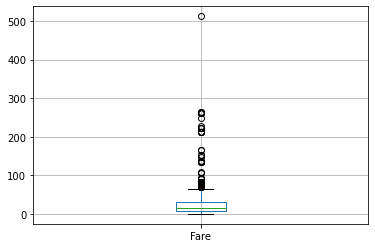

In [4]:
df_test[['Fare']].boxplot()

In [4]:
df_test['Fare'].fillna(df_test['Fare'][df_test['Fare'] < 500].median(), inplace = True)

[Text(0, 0, '107'), Text(0, 0, '93'), Text(0, 0, '218')]

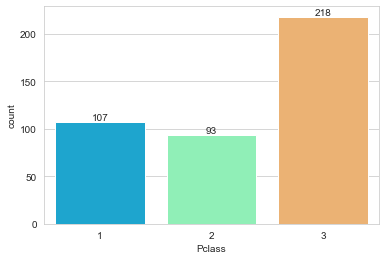

In [21]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Pclass',data=df_test,palette='rainbow')
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

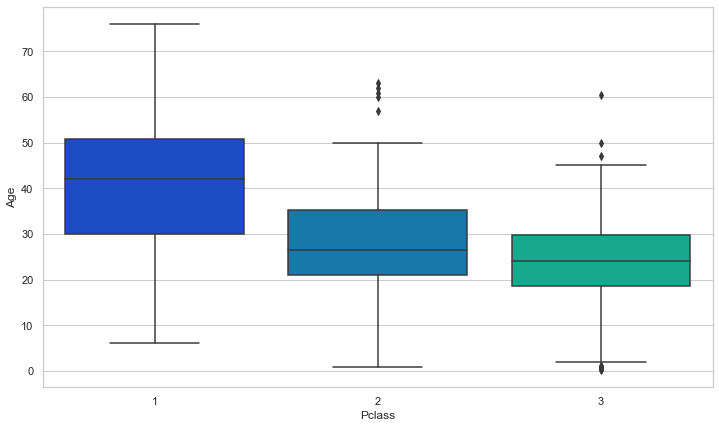

In [99]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df_test, palette = 'winter')

In [5]:
round(df_test["Age"][df_test['Fare'] < 500][df_test["Pclass"] == 1].mean(),0)

41.0

In [5]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df_test['Age'] = df_test[['Age', 'Pclass']].apply(impute_age_test, axis = 1)

[Text(0, 0, '266'), Text(0, 0, '152')]

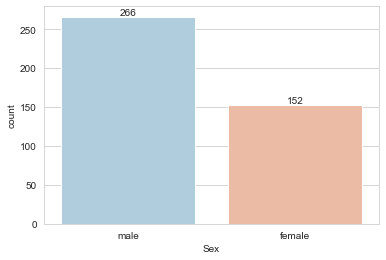

In [17]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Sex', data = df_test, palette = 'RdBu_r')
ax.bar_label(ax.containers[0])

In [6]:
sex = pd.get_dummies(df_test['Sex'], drop_first = True)
embark = pd.get_dummies(df_test['Embarked'], drop_first = True)

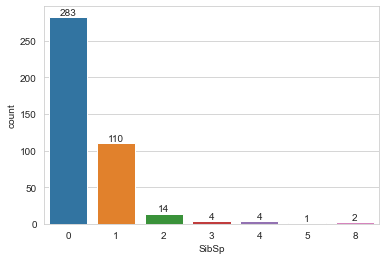

In [35]:
ax = sns.countplot(x = 'SibSp', data = df_test)
ax.bar_label(ax.containers[0])
plt.show()

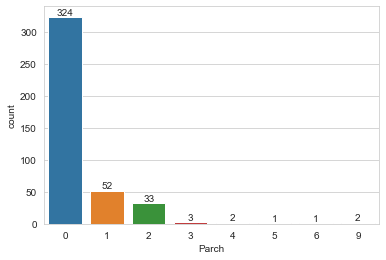

In [36]:
ax = sns.countplot(x = 'Parch', data = df_test)
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
df_test.drop(['Name', 'Ticket', 'Sex', 'Embarked', 'Cabin'], axis = 1, inplace = True)
df_test = pd.concat([df_test, sex, embark], axis = 1)
df_test.set_index('PassengerId', inplace = True)
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,1,1,0
893,3,47.0,1,0,7.0000,0,0,1
894,2,62.0,0,0,9.6875,1,1,0
895,3,27.0,0,0,8.6625,1,0,1
896,3,22.0,1,1,12.2875,0,0,1


In [127]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


### Clean the training data 

#### Handle missing data

<AxesSubplot:>

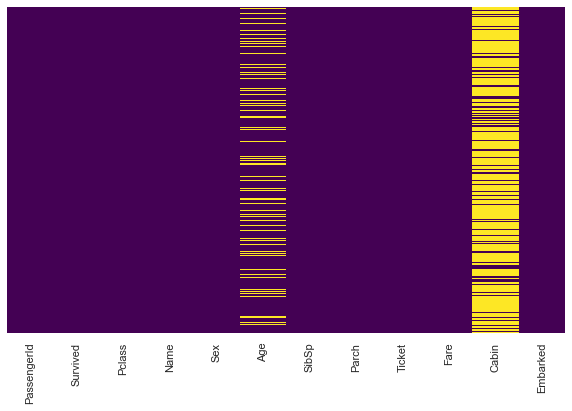

In [4]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Survived Column

[Text(0, 0, '549'), Text(0, 0, '342')]

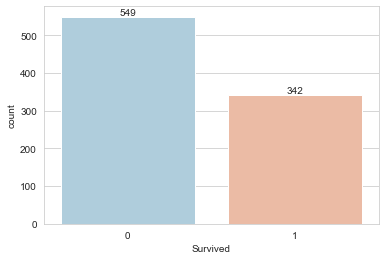

In [19]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Survived', data = df, palette = 'RdBu_r')
ax.bar_label(ax.containers[0])

=> May use oversampling or undersampling (the survival number is not balanced)

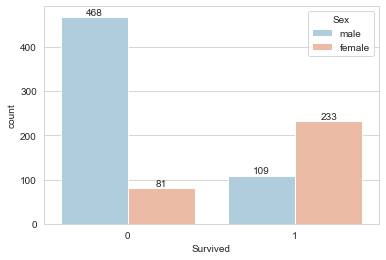

In [20]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Survived', data = df, hue = 'Sex', palette = 'RdBu_r')
for container in ax.containers:
    ax.bar_label(container)

[Text(0, 0, '577'), Text(0, 0, '314')]

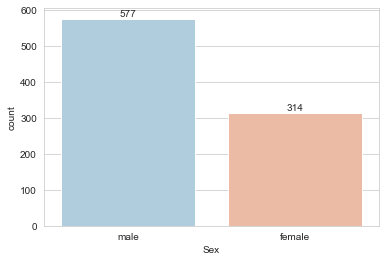

In [18]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Sex', data = df, palette = 'RdBu_r')
ax.bar_label(ax.containers[0])

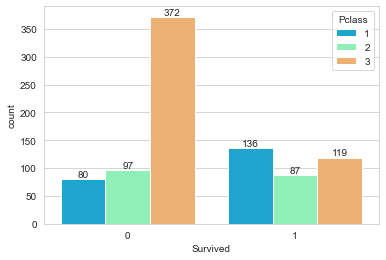

In [22]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')
for container in ax.containers:
    ax.bar_label(container)

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

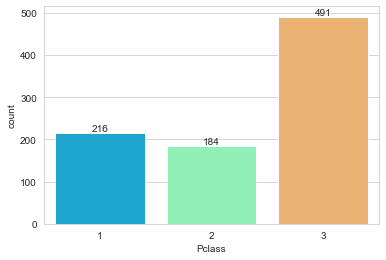

In [25]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Pclass',data=df,palette='rainbow')
ax.bar_label(ax.containers[0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

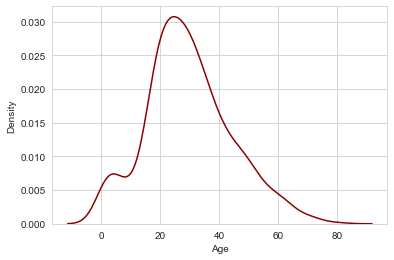

In [23]:
sns.distplot(df['Age'].dropna(),hist=False,color='darkred',bins=30, kde = True)

<AxesSubplot:>

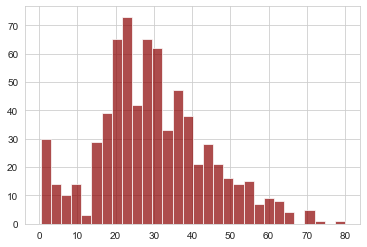

In [24]:
df['Age'].hist(bins = 30, color = 'darkred', alpha = 0.7)

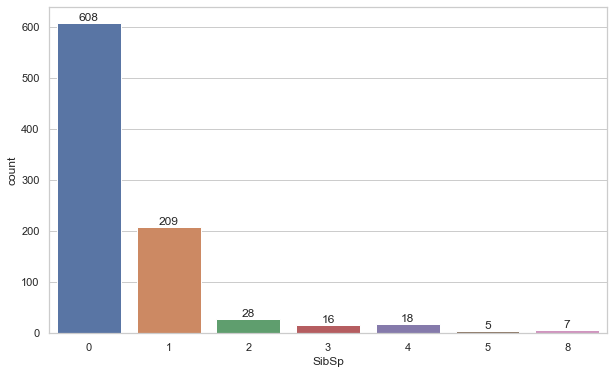

In [24]:
ax = sns.countplot(x = ['SibSp', data = df)
ax.bar_label(ax.containers[0])
plt.show()

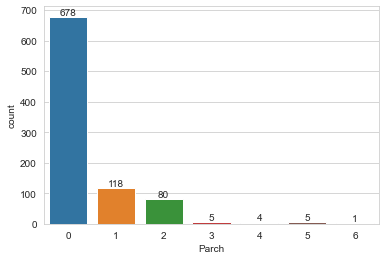

In [29]:
ax = sns.countplot(x = 'Parch', data = df)
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot:>

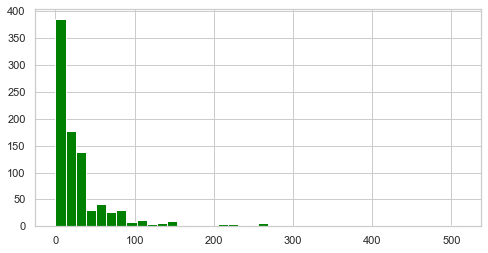

In [25]:
df['Fare'].hist(color = 'green', bins = 40, figsize = (8,4))

{'whiskers': [<matplotlib.lines.Line2D at 0x2823d8ab280>,
 'caps': [<matplotlib.lines.Line2D at 0x2823d8ab9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2823d89be80>],
 'medians': [<matplotlib.lines.Line2D at 0x2823d8b6100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2823d8b6490>],
 'means': []}

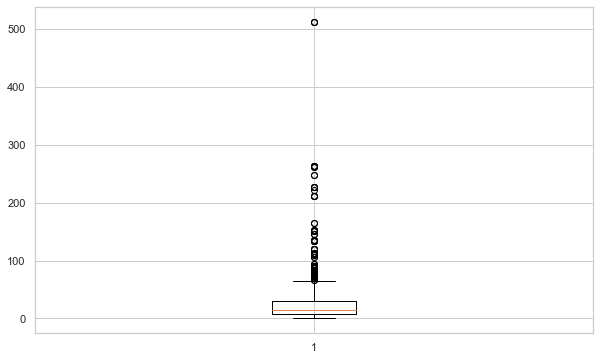

In [26]:
plt.boxplot(df['Fare'])

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

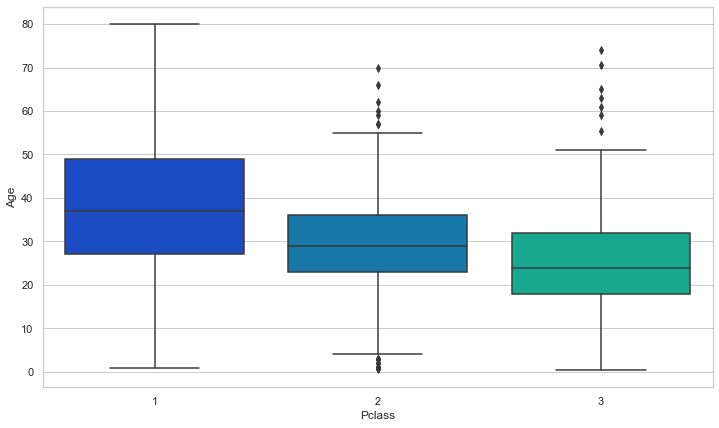

In [28]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette = 'winter')

**Remove outliers**

In [8]:
df = pd.read_csv('train.csv', low_memory = False)
df = df[df['Fare'] < 500]

print(round(df["Age"][df["Pclass"] == 1].mean(),0))
print(round(df["Age"][df["Pclass"] == 2].mean(),0))
print(round(df["Age"][df["Pclass"] == 3].mean(),0))

38.0
30.0
25.0


In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)
df.drop('Cabin', axis = 1, inplace = True)
df['Embarked'].fillna('S', inplace = True)

### Convert Categorical Features

In [10]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

df.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)
df = pd.concat([df, sex, embark], axis = 1)
df.set_index('PassengerId', inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


### Building Model

#### 1. Logistic Regression 

**Hyperparameters Tuning**

In [165]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000, 10000]
    }
]

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

lr = LogisticRegression()
find_logit_hyper = GridSearchCV(lr, param_grid = param_grid, cv = 4, verbose = True, n_jobs = -1)

In [168]:
find_best_logit_hyper = find_logit_hyper.fit(x_train, y_train)

Fitting 4 folds for each of 2000 candidates, totalling 8000 fits


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\line

In [169]:
best_logit_hyper = find_best_logit_hyper.best_estimator_
best_logit_hyper

LogisticRegression(C=0.08858667904100823, solver='newton-cg')

#### 1. Logistic Regression

In [170]:
X = df.drop('Survived', axis = 1)
Y = df['Survived']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr_accuracy_train =  []
lr_accuracy_val =  []
c = 0
for i in np.random.randint(100, size = 20):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = i) # i = 46
    lr = LogisticRegression(C = 0.1, solver='newton-cg', max_iter = 10000)
    lr.fit(x_train, y_train)
    yhat_lr = lr.predict(x_val)
    lr_accuracy_train.append(lr.score(x_train, y_train))
    lr_accuracy_val.append(lr.score(x_val, y_val))

print('Average Accuracy of the Training set:', np.mean(lr_accuracy_train))
print('Average Accuracy of the Validation set:', np.mean(lr_accuracy_val))

Average Accuracy of the Training set: 0.8107427055702917
Average Accuracy of the Validation set: 0.8156716417910447


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)
lr = LogisticRegression(C = 10, solver='newton-cg', max_iter = 10000)
lr.fit(x_train, y_train)
yhat_lr = lr.predict(x_val)

print(classification_report(y_val, yhat_lr))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        71
           1       0.87      0.73      0.79        63

    accuracy                           0.82       134
   macro avg       0.83      0.82      0.82       134
weighted avg       0.83      0.82      0.82       134



#### Testing Logistic Regression on the test set

In [15]:
df_sub = df_test.copy()
df_sub.reset_index(inplace = True)
df_test_outlier = df_sub[df_sub['Fare'] > 500]
df_test_outlier.loc[:,'Survived'] = 1
df_sub = df_sub[df_sub['Fare'] < 500]
df_sub.set_index('PassengerId', inplace = True)

# Need modifying
yhat_test = lr.predict(df_sub)
df_sub['Survived'] = yhat_test
# Need modifying

df_sub.reset_index(inplace = True)
df_sub = pd.concat([df_sub, df_test_outlier], axis = 0)
df_sub.sort_values(by = 'PassengerId', inplace = True)
df_sub = df_sub[['PassengerId', 'Survived']]
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [16]:
df_sub.set_index('PassengerId').to_csv('titanic_prediction.csv')

### 2. K Nearest Neighbors

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Optimal k: 5


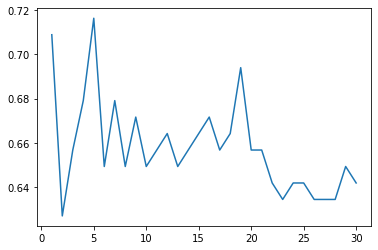

In [19]:
X = df.drop('Survived', axis = 1)
Y = df['Survived']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

accuracy_scores = {}

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2, algorithm = 'auto')
    knn.fit(x_train, y_train)
    yhat_knn = knn.predict(x_val)
    accuracy_scores[i] = accuracy_score(y_val, yhat_knn)
    
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, algorithm = 'auto')
knn.fit(x_train, y_train)
yhat_knn = knn.predict(x_val)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, yhat_knn))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        71
           1       0.73      0.63      0.68        63

    accuracy                           0.72       134
   macro avg       0.72      0.71      0.71       134
weighted avg       0.72      0.72      0.71       134



### 3. Support Vector Machines

**Hyperparameters Tuning**

In [17]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

svc = SVC()
find_svc_hyper = GridSearchCV(svc, param_grid = param_grid, refit = True, verbose = 2, cv = 4)

In [ ]:
find_best_svc_hyper = find_svc_hyper.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.8s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s


In [ ]:
best_svc_hyper = find_best_svc_hyper.best_estimator_
best_svc_hyper

**SVC model**

In [170]:
X = df.drop('Survived', axis = 1)
Y = df['Survived']

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_accuracy_train =  []
svc_accuracy_val =  []

for i in np.random.randint(100, size = 20):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = i) # i = 46
    svc = SVC(C = )
    svc.fit(x_train, y_train)
    yhat_svc = svc.predict(x_val)
    svc_accuracy_train.append(svc.accuracy_score(x_train, y_train))
    svc_accuracy_val.append(svc.accuracy_score(x_val, y_val))

print('Average Accuracy of the Training set:', np.mean(svc_accuracy_train))
print('Average Accuracy of the Validation set:', np.mean(svc_accuracy_val))

Average Accuracy of the Training set: 0.8107427055702917
Average Accuracy of the Validation set: 0.8156716417910447


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

svc = SVC()
svc.fit(x_train, y_train)
yhat_svc = svc.predict(x_val)

print(classification_report(y_val, yhat_svc))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68        71
           1       0.58      0.17      0.27        63

    accuracy                           0.55       134
   macro avg       0.56      0.53      0.47       134
weighted avg       0.56      0.55      0.49       134



### 4. Naive Bayes (GaussianNB)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

X = df.drop('Survived', axis = 1)
Y = df['Survived']

gnb = GaussianNB()

result = cross_val_score(nb, X, Y, cv = 10)
print('GaussianNB: %.3f' % (result.mean() * 100))

GaussianNB: 77.815


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
yhat_gnb = gnb.predict(x_val)

print(classification_report(y_val, yhat_gnb))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        71
           1       0.75      0.73      0.74        63

    accuracy                           0.76       134
   macro avg       0.76      0.76      0.76       134
weighted avg       0.76      0.76      0.76       134



### 5. Multinomial Naive Bayes

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

mnb = MultinomialNB()
mnb.fit(x_train, y_train)
yhat_mnb = mnb.predict(x_val)

print(classification_report(y_val, yhat_mnb))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        71
           1       0.70      0.48      0.57        63

    accuracy                           0.66       134
   macro avg       0.67      0.65      0.64       134
weighted avg       0.67      0.66      0.65       134



### 6. Bernoulli Naive Bayes

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
yhat_bnb = bnb.predict(x_val)

print(classification_report(y_val, yhat_bnb))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        71
           1       0.78      0.71      0.74        63

    accuracy                           0.77       134
   macro avg       0.77      0.77      0.77       134
weighted avg       0.77      0.77      0.77       134



In [45]:
df_sub = df_test.copy()
df_sub.reset_index(inplace = True)
df_test_outlier = df_sub[df_sub['Fare'] > 500]
df_test_outlier.loc[:,'Survived'] = 1
df_sub = df_sub[df_sub['Fare'] < 500]
df_sub.set_index('PassengerId', inplace = True)

# Need modifying
yhat_test_bnb = bnb.predict(df_sub)
df_sub['Survived'] = yhat_test_bnb
# Need modifying

df_sub.reset_index(inplace = True)
df_sub = pd.concat([df_sub, df_test_outlier], axis = 0)
df_sub.sort_values(by = 'PassengerId', inplace = True)
df_sub = df_sub[['PassengerId', 'Survived']]
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [53]:
df_sub.set_index('PassengerId').to_csv('titanic_prediction.csv')

#### 7.1. Oversampling and Undersampling (SMOTE) with Logistic Regression

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

os = SMOTE(random_state = 46)

os_x, os_y = os.fit_resample(x_train, y_train)
lr_os = LogisticRegression(C = 0.1, solver='newton-cg', max_iter = 10000)
lr_os.fit(os_x, os_y)

result = cross_val_score(lr_os, os_x, os_y, cv = 4)
result.mean()

0.8085774058577405

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

yhat_os = lr_os.predict(x_val)
print(classification_report(yhat_os, y_val))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        75
           1       0.78      0.83      0.80        59

    accuracy                           0.82       134
   macro avg       0.82      0.82      0.82       134
weighted avg       0.82      0.82      0.82       134



In [50]:
df_sub = df_test.copy()
df_sub.reset_index(inplace = True)
df_test_outlier = df_sub[df_sub['Fare'] > 500]
df_test_outlier.loc[:,'Survived'] = 1
df_sub = df_sub[df_sub['Fare'] < 500]
df_sub.set_index('PassengerId', inplace = True)

# Need modifying
yhat_test_lr_os = lr_os.predict(df_sub)
df_sub['Survived'] = yhat_test_lr_os
# Need modifying

df_sub.reset_index(inplace = True)
df_sub = pd.concat([df_sub, df_test_outlier], axis = 0)
df_sub.sort_values(by = 'PassengerId', inplace = True)
df_sub = df_sub[['PassengerId', 'Survived']]
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [53]:
df_sub.set_index('PassengerId').to_csv('titanic_prediction.csv')

#### 7.2. Oversampling and Undersampling (SMOTE) with K Nearest Neighbors

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

os = SMOTE(random_state = 46)

os_x, os_y = os.fit_resample(x_train, y_train)
knn_os = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, algorithm = 'auto')
knn_os.fit(os_x, os_y)

result = cross_val_score(knn_os, os_x, os_y, cv = 4)
result.mean()

0.743723849372385

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, knn_os.predict(x_val)))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        71
           1       0.69      0.73      0.71        63

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.72      0.72      0.72       134



### 8. Random Forest

In [49]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

rf = RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)
rf.fit(x_train, y_train)
yhat_rf = rf.predict(x_val)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, yhat_rf))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        71
           1       1.00      0.52      0.69        63

    accuracy                           0.78       134
   macro avg       0.85      0.76      0.76       134
weighted avg       0.84      0.78      0.76       134



In [50]:
df_sub = df_test.copy()
df_sub.reset_index(inplace = True)
df_test_outlier = df_sub[df_sub['Fare'] > 500]
df_test_outlier.loc[:,'Survived'] = 1
df_sub = df_sub[df_sub['Fare'] < 500]
df_sub.set_index('PassengerId', inplace = True)

# Need modifying
yhat_test_rf = rf.predict(df_sub)
df_sub['Survived'] = yhat_test_rf
# Need modifying

df_sub.reset_index(inplace = True)
df_sub = pd.concat([df_sub, df_test_outlier], axis = 0)
df_sub.sort_values(by = 'PassengerId', inplace = True)
df_sub = df_sub[['PassengerId', 'Survived']]
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [51]:
df_sub.set_index('PassengerId').to_csv('titanic_prediction.csv')

SMOTE WITH RANDOM FOREST

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

os = SMOTE(random_state = 46)

os_x, os_y = os.fit_resample(x_train, y_train)
rf_os = RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)
rf_os.fit(x_train, y_train)

result = cross_val_score(rf_os, os_x, os_y, cv = 4)
result.mean()

0.8148535564853557

In [41]:
yhat_rf_os = rf_os.predict(x_val)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, yhat_rf_os))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        71
           1       1.00      0.52      0.69        63

    accuracy                           0.78       134
   macro avg       0.85      0.76      0.76       134
weighted avg       0.84      0.78      0.76       134



In [42]:
df_sub = df_test.copy()
df_sub.reset_index(inplace = True)
df_test_outlier = df_sub[df_sub['Fare'] > 500]
df_test_outlier.loc[:,'Survived'] = 1
df_sub = df_sub[df_sub['Fare'] < 500]
df_sub.set_index('PassengerId', inplace = True)

# Need modifying
yhat_test_rf = rf_os.predict(df_sub)
df_sub['Survived'] = yhat_test_rf
# Need modifying

df_sub.reset_index(inplace = True)
df_sub = pd.concat([df_sub, df_test_outlier], axis = 0)
df_sub.sort_values(by = 'PassengerId', inplace = True)
df_sub = df_sub[['PassengerId', 'Survived']]
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [43]:
df_sub.set_index('PassengerId').to_csv('titanic_prediction.csv')

- Logistic Regression
- Support Vector Machines
- Naive Bayes
- Nearest Neighbor
- Decision Trees
- Neural Networks


https://ruslanmv.com/blog/The-best-binary-Machine-Learning-Model

In [32]:
# df.reset_index()[df['index'] == 896]
df_test.reset_index()[df_test.reset_index()['PassengerId'] == 896]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
4,896,3,22.0,1,1,12.2875,0,0,1


In [36]:
check = df.reset_index()
check[check['Pclass'] == 3][check['male'] == 0][check['S'] == 1][check['SibSp'] == 1][check['Parch'] == 1]

C:\Users\Admin\AppData\Local\Temp/ipykernel_3600/3442111045.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  check[check['Pclass'] == 3][check['male'] == 0][check['S'] == 1][check['SibSp'] == 1][check['Parch'] == 1]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
10,11,1,3,4.0,1,1,16.7000,0,0,1
172,173,1,3,1.0,1,1,11.1333,0,0,1
251,252,0,3,29.0,1,1,10.4625,0,0,1
278,280,1,3,35.0,1,1,20.2500,0,0,1
327,329,1,3,31.0,1,1,20.5250,0,0,1
422,424,0,3,28.0,1,1,14.4000,0,0,1
796,800,0,3,30.0,1,1,24.1500,0,0,1


### 8. Decision Tree

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X = df.drop('Survived', axis = 1)
Y = df['Survived']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, random_state = 46)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt.fit(x_train, y_train)
yhat_dt = dt.predict(x_val)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_val, yhat_dt))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        71
           1       0.87      0.73      0.79        63

    accuracy                           0.82       134
   macro avg       0.83      0.82      0.82       134
weighted avg       0.83      0.82      0.82       134



In [47]:
df_sub = df_test.copy()
df_sub.reset_index(inplace = True)
df_test_outlier = df_sub[df_sub['Fare'] > 500]
df_test_outlier.loc[:,'Survived'] = 1
df_sub = df_sub[df_sub['Fare'] < 500]
df_sub.set_index('PassengerId', inplace = True)

# Need modifying
yhat_test_dt = dt.predict(df_sub)
df_sub['Survived'] = yhat_test_dt
# Need modifying

df_sub.reset_index(inplace = True)
df_sub = pd.concat([df_sub, df_test_outlier], axis = 0)
df_sub.sort_values(by = 'PassengerId', inplace = True)
df_sub = df_sub[['PassengerId', 'Survived']]
df_sub

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
412,1305,0
413,1306,1
414,1307,0
415,1308,0


In [48]:
df_sub.set_index('PassengerId').to_csv('titanic_prediction.csv')